<a href="https://colab.research.google.com/github/PHYRA47/Google-Colab/blob/main/Car_Acceptability_Multiclass_Classification_Using_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Car Acceptability Multiclass Classification Using DNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving car.csv to car.csv


In [5]:
import io
df=pd.read_csv(io.BytesIO(uploaded['car.csv']))

In [6]:
df.shape

(1728, 7)

In [7]:
df

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [8]:
for i in df.columns:
  print(f"Fitur {i}")
  print(df[i].value_counts())

Fitur Buying_Price
vhigh    432
high     432
med      432
low      432
Name: Buying_Price, dtype: int64
Fitur Maintenance_Price
vhigh    432
high     432
med      432
low      432
Name: Maintenance_Price, dtype: int64
Fitur No_of_Doors
2        432
3        432
4        432
5more    432
Name: No_of_Doors, dtype: int64
Fitur Person_Capacity
2       576
4       576
more    576
Name: Person_Capacity, dtype: int64
Fitur Size_of_Luggage
small    576
med      576
big      576
Name: Size_of_Luggage, dtype: int64
Fitur Safety
low     576
med     576
high    576
Name: Safety, dtype: int64
Fitur Car_Acceptability
unacc    1210
acc       384
good       69
vgood      65
Name: Car_Acceptability, dtype: int64


In [9]:
for i in df.columns:
  df = pd.concat([df, pd.get_dummies(df[i], prefix=f"{i}")], axis=1)
  df.drop(columns=i, inplace=True)

In [10]:
df

,Buying_Price_high,Buying_Price_low,Buying_Price_med,Buying_Price_vhigh,Maintenance_Price_high,Maintenance_Price_low,Maintenance_Price_med,Maintenance_Price_vhigh,No_of_Doors_2,No_of_Doors_3,...,Size_of_Luggage_big,Size_of_Luggage_med,Size_of_Luggage_small,Safety_high,Safety_low,Safety_med,Car_Acceptability_acc,Car_Acceptability_good,Car_Acceptability_unacc,Car_Acceptability_vgood
0,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1724,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


<Axes: >

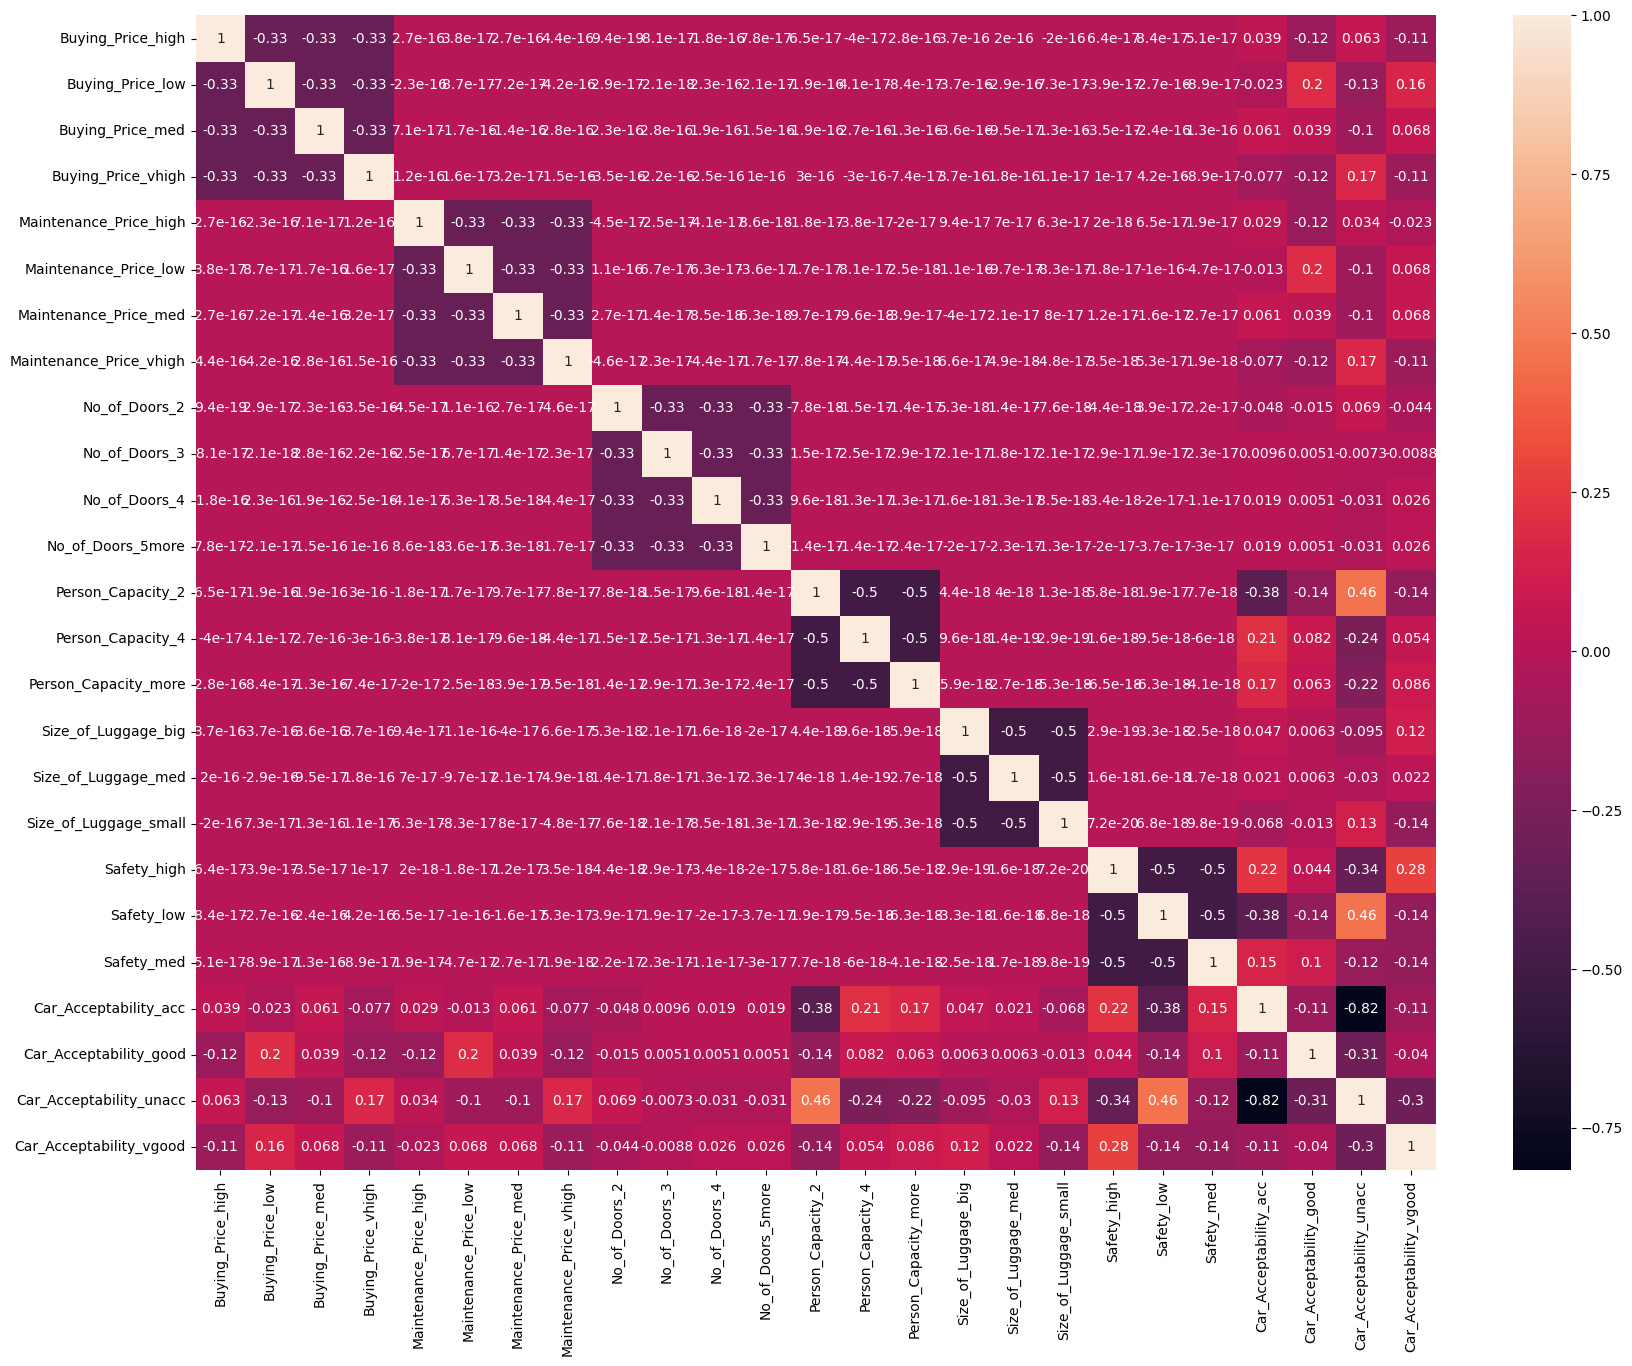

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

In [12]:
X = df[df.columns[:-4]]
y = df[df.columns[-4:]]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

cp = ModelCheckpoint('model/', save_best_only=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[cp]
)

Epoch 1/100
19/22 [========================>.....] - ETA: 0s - loss: 0.9750 - accuracy: 0.6562

22/22 [==============================] - 5s 136ms/step - loss: 0.9498 - accuracy: 0.6599 - val_loss: 0.7539 - val_accuracy: 0.6792
Epoch 2/100
19/22 [========================>.....] - ETA: 0s - loss: 0.6962 - accuracy: 0.7039

22/22 [==============================] - 2s 94ms/step - loss: 0.6877 - accuracy: 0.7055 - val_loss: 0.5632 - val_accuracy: 0.6792
Epoch 3/100
17/22 [======================>.......] - ETA: 0s - loss: 0.5659 - accuracy: 0.7197

22/22 [==============================] - 3s 129ms/step - loss: 0.5575 - accuracy: 0.7301 - val_loss: 0.4637 - val_accuracy: 0.8497
Epoch 4/100
17/22 [======================>.......] - ETA: 0s - loss: 0.4728 - accuracy: 0.8006

22/22 [==============================] - 3s 150ms/step - loss: 0.4680 - accuracy: 0.8054 - val_loss: 0.3681 - val_accuracy: 0.8786
Epoch 5/100
20/22 [==========================>...] - ETA: 0s - loss: 0.4338 - accuracy: 0.8266

22/22 [==============================] - 3s 138ms/step - loss: 0.4371 - accuracy: 0.8263 - val_loss: 0.3417 - val_accuracy: 0.8728
Epoch 6/100
20/22 [==========================>...] - ETA: 0s - loss: 0.4004 - accuracy: 0.8305

22/22 [==============================] - 2s 98ms/step - loss: 0.3968 - accuracy: 0.8321 - val_loss: 0.3270 - val_accuracy: 0.8931
Epoch 7/100
19/22 [========================>.....] - ETA: 0s - loss: 0.3573 - accuracy: 0.8479

22/22 [==============================] - 2s 107ms/step - loss: 0.3451 - accuracy: 0.8531 - val_loss: 0.2730 - val_accuracy: 0.8960
Epoch 8/100
16/22 [====================>.........] - ETA: 0s - loss: 0.3237 - accuracy: 0.8564

22/22 [==============================] - 3s 163ms/step - loss: 0.3275 - accuracy: 0.8546 - val_loss: 0.2500 - val_accuracy: 0.9017
Epoch 9/100
22/22 [==============================] - 0s 14ms/step - loss: 0.3067 - accuracy: 0.8625 - val_loss: 0.2524 - val_accuracy: 0.9306
Epoch 10/100
21/22 [===========================>..] - ETA: 0s - loss: 0.2717 - accuracy: 0.8780

22/22 [==============================] - 2s 100ms/step - loss: 0.2719 - accuracy: 0.8777 - val_loss: 0.2109 - val_accuracy: 0.9249
Epoch 11/100
22/22 [==============================] - 0s 9ms/step - loss: 0.2583 - accuracy: 0.8871 - val_loss: 0.2305 - val_accuracy: 0.9017
Epoch 12/100
21/22 [===========================>..] - ETA: 0s - loss: 0.2421 - accuracy: 0.8936

22/22 [==============================] - 2s 95ms/step - loss: 0.2400 - accuracy: 0.8951 - val_loss: 0.2008 - val_accuracy: 0.9075
Epoch 13/100
22/22 [==============================] - ETA: 0s - loss: 0.2619 - accuracy: 0.8907

22/22 [==============================] - 2s 103ms/step - loss: 0.2619 - accuracy: 0.8907 - val_loss: 0.1865 - val_accuracy: 0.9249
Epoch 14/100
16/22 [====================>.........] - ETA: 0s - loss: 0.2321 - accuracy: 0.8926

22/22 [==============================] - 3s 129ms/step - loss: 0.2229 - accuracy: 0.8958 - val_loss: 0.1805 - val_accuracy: 0.9191
Epoch 15/100
22/22 [==============================] - 0s 9ms/step - loss: 0.2291 - accuracy: 0.9016 - val_loss: 0.1928 - val_accuracy: 0.9162
Epoch 16/100
22/22 [==============================] - 0s 9ms/step - loss: 0.2029 - accuracy: 0.9124 - val_loss: 0.1860 - val_accuracy: 0.9191
Epoch 17/100
15/22 [===================>..........] - ETA: 0s - loss: 0.1778 - accuracy: 0.9198

22/22 [==============================] - 3s 119ms/step - loss: 0.1875 - accuracy: 0.9139 - val_loss: 0.1760 - val_accuracy: 0.9220
Epoch 18/100
22/22 [==============================] - 0s 12ms/step - loss: 0.1969 - accuracy: 0.9153 - val_loss: 0.1812 - val_accuracy: 0.9249
Epoch 19/100
18/22 [=======================>......] - ETA: 0s - loss: 0.1775 - accuracy: 0.9219

22/22 [==============================] - 3s 125ms/step - loss: 0.1784 - accuracy: 0.9233 - val_loss: 0.1650 - val_accuracy: 0.9306
Epoch 20/100
22/22 [==============================] - 0s 9ms/step - loss: 0.1747 - accuracy: 0.9262 - val_loss: 0.1892 - val_accuracy: 0.9133
Epoch 21/100
19/22 [========================>.....] - ETA: 0s - loss: 0.1638 - accuracy: 0.9334

22/22 [==============================] - 2s 100ms/step - loss: 0.1663 - accuracy: 0.9298 - val_loss: 0.1385 - val_accuracy: 0.9422
Epoch 22/100
19/22 [========================>.....] - ETA: 0s - loss: 0.1681 - accuracy: 0.9260

22/22 [==============================] - 4s 179ms/step - loss: 0.1643 - accuracy: 0.9269 - val_loss: 0.1323 - val_accuracy: 0.9480
Epoch 23/100
16/22 [====================>.........] - ETA: 0s - loss: 0.1290 - accuracy: 0.9385

22/22 [==============================] - 2s 105ms/step - loss: 0.1405 - accuracy: 0.9342 - val_loss: 0.1218 - val_accuracy: 0.9509
Epoch 24/100
22/22 [==============================] - 0s 15ms/step - loss: 0.1513 - accuracy: 0.9276 - val_loss: 0.1453 - val_accuracy: 0.9422
Epoch 25/100
19/22 [========================>.....] - ETA: 0s - loss: 0.1505 - accuracy: 0.9334

22/22 [==============================] - 3s 133ms/step - loss: 0.1425 - accuracy: 0.9370 - val_loss: 0.1201 - val_accuracy: 0.9566
Epoch 26/100
22/22 [==============================] - 0s 9ms/step - loss: 0.1201 - accuracy: 0.9544 - val_loss: 0.1261 - val_accuracy: 0.9566
Epoch 27/100
20/22 [==========================>...] - ETA: 0s - loss: 0.1355 - accuracy: 0.9477

22/22 [==============================] - 2s 92ms/step - loss: 0.1357 - accuracy: 0.9479 - val_loss: 0.1183 - val_accuracy: 0.9538
Epoch 28/100
12/22 [===============>..............] - ETA: 0s - loss: 0.1097 - accuracy: 0.9583

22/22 [==============================] - 2s 113ms/step - loss: 0.1226 - accuracy: 0.9530 - val_loss: 0.1082 - val_accuracy: 0.9566
Epoch 29/100
22/22 [==============================] - 0s 8ms/step - loss: 0.1148 - accuracy: 0.9544 - val_loss: 0.1170 - val_accuracy: 0.9538
Epoch 30/100
17/22 [======================>.......] - ETA: 0s - loss: 0.1058 - accuracy: 0.9623

22/22 [==============================] - 2s 98ms/step - loss: 0.1013 - accuracy: 0.9638 - val_loss: 0.0913 - val_accuracy: 0.9624
Epoch 31/100
22/22 [==============================] - 0s 9ms/step - loss: 0.1042 - accuracy: 0.9588 - val_loss: 0.1006 - val_accuracy: 0.9624
Epoch 32/100
22/22 [==============================] - 0s 8ms/step - loss: 0.1108 - accuracy: 0.9566 - val_loss: 0.1075 - val_accuracy: 0.9595
Epoch 33/100
19/22 [========================>.....] - ETA: 0s - loss: 0.0928 - accuracy: 0.9663

22/22 [==============================] - 2s 98ms/step - loss: 0.0964 - accuracy: 0.9667 - val_loss: 0.0714 - val_accuracy: 0.9653
Epoch 34/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0883 - accuracy: 0.9703 - val_loss: 0.1084 - val_accuracy: 0.9624
Epoch 35/100
22/22 [==============================] - 0s 12ms/step - loss: 0.0797 - accuracy: 0.9747 - val_loss: 0.0925 - val_accuracy: 0.9653
Epoch 36/100
22/22 [==============================] - 0s 13ms/step - loss: 0.1032 - accuracy: 0.9573 - val_loss: 0.1084 - val_accuracy: 0.9653
Epoch 37/100
22/22 [==============================] - 0s 12ms/step - loss: 0.0811 - accuracy: 0.9682 - val_loss: 0.0756 - val_accuracy: 0.9798
Epoch 38/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0811 - accuracy: 0.9696 - val_loss: 0.0981 - val_accuracy: 0.9653
Epoch 39/100
22/22 [==============================] - 0s 12ms/step - loss: 0.0794 - accuracy: 0.9725 - val_loss: 0.0820 - val_accuracy: 0.9711
Epoch 40/100


22/22 [==============================] - 2s 115ms/step - loss: 0.0708 - accuracy: 0.9754 - val_loss: 0.0657 - val_accuracy: 0.9682
Epoch 42/100
13/22 [================>.............] - ETA: 0s - loss: 0.0729 - accuracy: 0.9724

22/22 [==============================] - 2s 92ms/step - loss: 0.0708 - accuracy: 0.9725 - val_loss: 0.0619 - val_accuracy: 0.9740
Epoch 43/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0582 - accuracy: 0.9790 - val_loss: 0.0803 - val_accuracy: 0.9769
Epoch 44/100
12/22 [===============>..............] - ETA: 0s - loss: 0.0606 - accuracy: 0.9779

22/22 [==============================] - 2s 114ms/step - loss: 0.0600 - accuracy: 0.9776 - val_loss: 0.0601 - val_accuracy: 0.9740
Epoch 45/100
19/22 [========================>.....] - ETA: 0s - loss: 0.0535 - accuracy: 0.9803

22/22 [==============================] - 2s 103ms/step - loss: 0.0510 - accuracy: 0.9805 - val_loss: 0.0568 - val_accuracy: 0.9740
Epoch 46/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0690 - accuracy: 0.9732 - val_loss: 0.0649 - val_accuracy: 0.9740
Epoch 47/100
17/22 [======================>.......] - ETA: 0s - loss: 0.0711 - accuracy: 0.9779

22/22 [==============================] - 2s 95ms/step - loss: 0.0651 - accuracy: 0.9805 - val_loss: 0.0515 - val_accuracy: 0.9711
Epoch 48/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0534 - accuracy: 0.9776 - val_loss: 0.0563 - val_accuracy: 0.9740
Epoch 49/100
20/22 [==========================>...] - ETA: 0s - loss: 0.0600 - accuracy: 0.9734

22/22 [==============================] - 3s 130ms/step - loss: 0.0612 - accuracy: 0.9732 - val_loss: 0.0355 - val_accuracy: 0.9827
Epoch 50/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0528 - accuracy: 0.9805 - val_loss: 0.0404 - val_accuracy: 0.9798
Epoch 51/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0512 - accuracy: 0.9797 - val_loss: 0.0530 - val_accuracy: 0.9827
Epoch 52/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0506 - accuracy: 0.9797 - val_loss: 0.0593 - val_accuracy: 0.9769
Epoch 53/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0467 - accuracy: 0.9870 - val_loss: 0.0494 - val_accuracy: 0.9827
Epoch 54/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0502 - val_accuracy: 0.9740
Epoch 55/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0487 - accuracy: 0.9826 - val_loss: 0.0556 - val_accuracy: 0.9711
Epoch 56/100
22/2

22/22 [==============================] - 3s 136ms/step - loss: 0.0369 - accuracy: 0.9863 - val_loss: 0.0322 - val_accuracy: 0.9913
Epoch 59/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0438 - accuracy: 0.9855 - val_loss: 0.0565 - val_accuracy: 0.9769
Epoch 60/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0319 - accuracy: 0.9870 - val_loss: 0.0629 - val_accuracy: 0.9740
Epoch 61/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0307 - accuracy: 0.9891 - val_loss: 0.0392 - val_accuracy: 0.9855
Epoch 62/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0367 - accuracy: 0.9877 - val_loss: 0.0419 - val_accuracy: 0.9884
Epoch 63/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0336 - accuracy: 0.9870 - val_loss: 0.0440 - val_accuracy: 0.9827
Epoch 64/100
18/22 [=======================>......] - ETA: 0s - loss: 0.0459 - accuracy: 0.9852

22/22 [==============================] - 3s 146ms/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.0261 - val_accuracy: 0.9855
Epoch 65/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 0.0436 - val_accuracy: 0.9855
Epoch 66/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0269 - accuracy: 0.9913 - val_loss: 0.0475 - val_accuracy: 0.9827
Epoch 67/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0312 - accuracy: 0.9884 - val_loss: 0.0406 - val_accuracy: 0.9827
Epoch 68/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0403 - val_accuracy: 0.9884
Epoch 69/100
17/22 [======================>.......] - ETA: 0s - loss: 0.0401 - accuracy: 0.9862

22/22 [==============================] - 3s 133ms/step - loss: 0.0375 - accuracy: 0.9855 - val_loss: 0.0162 - val_accuracy: 0.9913
Epoch 70/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0413 - accuracy: 0.9855 - val_loss: 0.0339 - val_accuracy: 0.9884
Epoch 71/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0576 - accuracy: 0.9805 - val_loss: 0.0382 - val_accuracy: 0.9827
Epoch 72/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0244 - accuracy: 0.9913 - val_loss: 0.0477 - val_accuracy: 0.9827
Epoch 73/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 0.9891 - val_loss: 0.0345 - val_accuracy: 0.9827
Epoch 74/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0215 - accuracy: 0.9949 - val_loss: 0.0210 - val_accuracy: 0.9884
Epoch 75/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.0244 - val_accuracy: 0.9884
Epoch 76/100
22/

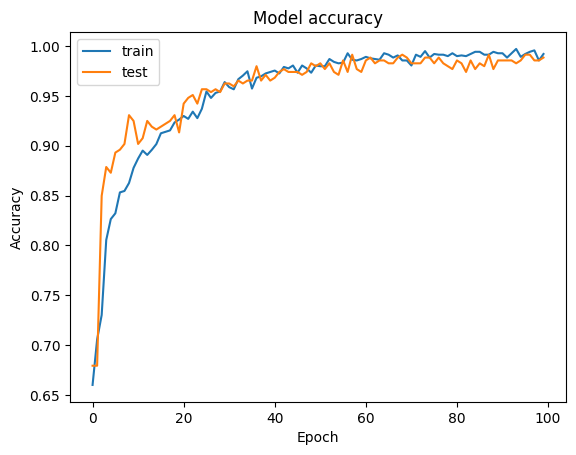

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
y_pred = model.predict(X_test)

11/11 [==============================] - 0s 7ms/step


In [17]:
y_test

,Car_Acceptability_acc,Car_Acceptability_good,Car_Acceptability_unacc,Car_Acceptability_vgood
599,0,0,1,0
1201,1,0,0,0
628,0,0,1,0
1498,1,0,0,0
1263,0,0,1,0
...,...,...,...,...
100,0,0,1,0
274,0,0,1,0
1206,0,0,1,0
101,0,0,1,0


In [18]:
y_pred = pd.DataFrame(y_pred, columns=list(y_test.columns))


y_test_list = []
y_pred_list = []

for i in range(len(y_pred)):
 y_test_list.append(y_test.columns[np.argmax(y_test.iloc[i])])
 y_pred_list.append(y_pred.columns[np.argmax(y_pred.iloc[i])])

                         precision    recall  f1-score   support

  Car_Acceptability_acc     1.0000    0.9639    0.9816        83
 Car_Acceptability_good     0.9167    1.0000    0.9565        11
Car_Acceptability_unacc     0.9916    1.0000    0.9958       235
Car_Acceptability_vgood     0.9412    0.9412    0.9412        17

               accuracy                         0.9884       346
              macro avg     0.9624    0.9763    0.9688       346
           weighted avg     0.9887    0.9884    0.9884       346



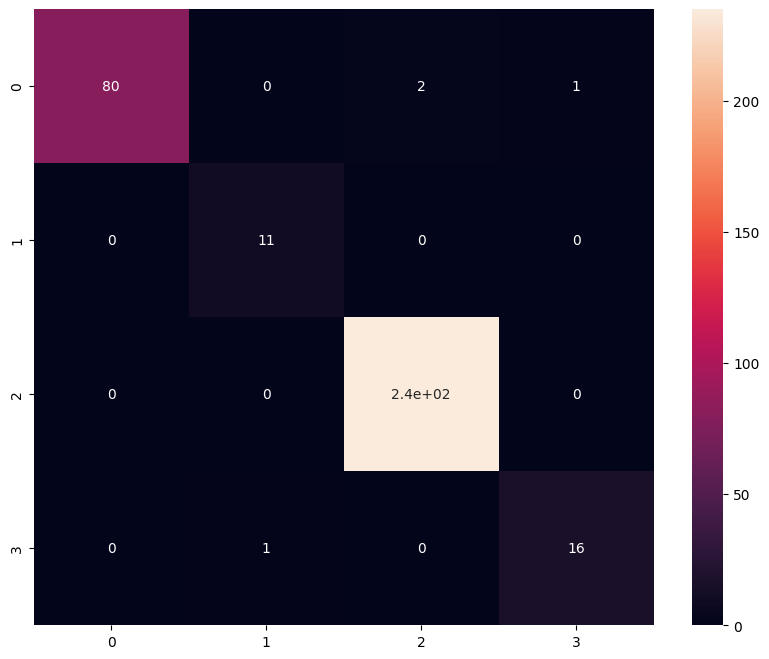

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_list, y_pred_list, digits=4))
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test_list, y_pred_list), annot=True)
plt.show()